![Banner](https://github.com/user-attachments/assets/bce12192-a20a-4cf4-a5f5-7e7f445aecaf)

# 📊 Análise dos Dados do SISPRENATAL
Este notebook tem como objetivo consolidar a análise exploratória realizada com base no banco de dados do SISPRENATAL, utilizando scripts previamente desenvolvidos.
---
**Seções:**
1. Análise de colunas e estrutura do dataset
2. Análise preliminar 2
3. Análise final com tratamentos e conclusões

## 🔍 Parte 1 – Análise de Colunas
Nesta seção, analisamos as colunas do dataset original do SISPRENATAL para entender melhor os dados disponíveis.

In [54]:
"""
Criado na Sexta Feira 04 de Abril de 2025 às 01:44:00
@author1: Alberto Nagem
"""
#Carrega o arquivo e mostra as colunas
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/GrupoMackenzie/ProjetoAplicado01-DataScience-Mackenzie-2025/main/datasets/sisprenatal_limpo.csv", encoding="latin1")
print(df.columns)
print(df.head())

Index(['CO_UF_IBGE', 'QT_CONSULT'], dtype='object')
   CO_UF_IBGE  QT_CONSULT
0          11         6.0
1          11         8.0
2          11         7.0
3          11         6.0
4          11         5.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974376 entries, 0 to 2974375
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CO_UF_IBGE  int64  
 1   QT_CONSULT  float64
dtypes: float64(1), int64(1)
memory usage: 45.4 MB


In [56]:
df.isnull().sum()

,0
CO_UF_IBGE,0
QT_CONSULT,0


In [57]:
df.nunique().sort_values()

,0
CO_UF_IBGE,27
QT_CONSULT,32


## 🧪 Parte 2 – Análise Preliminar 2
Análises estatísticas iniciais e observações específicas por colunas selecionadas.

In [82]:
# Carrega as dependencias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Retorna os tipos de dados e se há valores ausentes
print("🔍 Dimensões do dataset:", df.shape)
print("\n📊 Tipos de dados:")
print(df.dtypes)
print("\n❓ Valores ausentes por coluna:")
print(df.isnull().sum())

🔍 Dimensões do dataset: (2974376, 2)

📊 Tipos de dados:
CO_UF_IBGE      int64
QT_CONSULT    float64
dtype: object

❓ Valores ausentes por coluna:
CO_UF_IBGE    0
QT_CONSULT    0
dtype: int64


In [69]:
# Uma pequena estatística descritiva
print("\n📈 Estatísticas descritivas:")
print(df.describe())


📈 Estatísticas descritivas:
         CO_UF_IBGE    QT_CONSULT
count  2.974376e+06  2.974376e+06
mean   3.243358e+01  3.568284e+00
std    9.114490e+00  2.494923e+00
min    1.100000e+01  1.000000e+00
25%    2.600000e+01  1.000000e+00
50%    3.200000e+01  3.000000e+00
75%    4.100000e+01  5.000000e+00
max    5.300000e+01  3.600000e+01


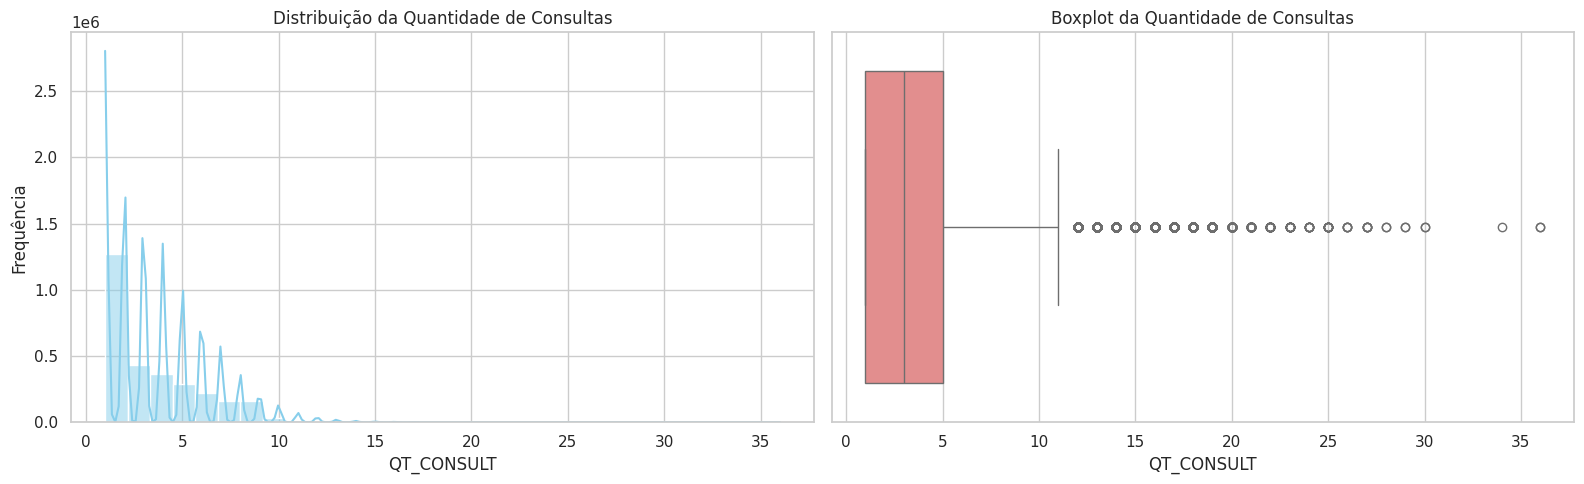

In [84]:
# Gráficos: distribuição e outliers
sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df["QT_CONSULT"], bins=30, kde=True, color="skyblue")
plt.title("Distribuição da Quantidade de Consultas")
plt.xlabel("QT_CONSULT")
plt.ylabel("Frequência")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["QT_CONSULT"], color="lightcoral")
plt.title("Boxplot da Quantidade de Consultas")
plt.xlabel("QT_CONSULT")

plt.tight_layout()
plt.show()


In [85]:
# Média de consultas por Unidade Federativa
media_por_uf = df.groupby("CO_UF_IBGE")["QT_CONSULT"].mean().round(2).reset_index()
media_por_uf.columns = ["UF", "Media_Consultas"]
print("\n📍 Média de consultas por estado:")
print(media_por_uf.sort_values(by="Media_Consultas", ascending=False))


📍 Média de consultas por estado:
    UF  Media_Consultas
19  35             4.10
20  41             4.08
21  42             4.01
6   17             3.87
0   11             3.78
23  50             3.75
22  43             3.71
16  31             3.68
9   23             3.67
24  51             3.65
17  32             3.55
18  33             3.24
8   22             3.23
11  25             3.09
12  26             3.04
1   12             3.01
13  27             2.99
15  29             2.94
10  24             2.73
4   15             2.65
3   14             2.55
2   13             2.50
7   21             2.46
25  52             2.46
14  28             2.31
5   16             1.28
26  53             1.04


<Figure size 1200x1000 with 0 Axes>

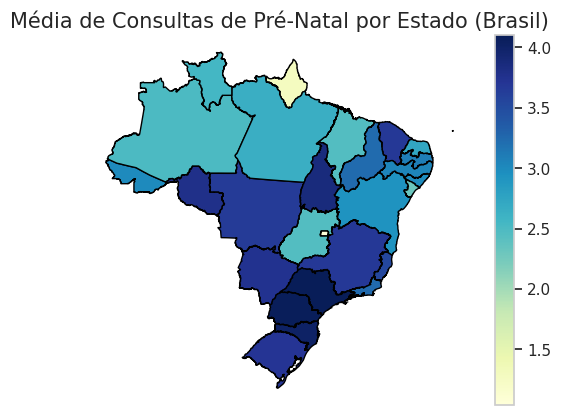

In [86]:
# Mapa Temático

# Carrega a malha geográfica de estados do IBGE
# Fonte alternativa: https://github.com/codeforamerica/click_that_hood/blob/master/public/data/brazil-states.geojson
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
ufs = gpd.read_file(url)

# Ajustei para merge
codigo_uf_ibge = {
    12: "Acre", 27: "Alagoas", 13: "Amazonas", 16: "Amapá", 29: "Bahia", 23: "Ceará",
    53: "Distrito Federal", 32: "Espírito Santo", 52: "Goiás", 21: "Maranhão",
    31: "Minas Gerais", 50: "Mato Grosso do Sul", 51: "Mato Grosso", 15: "Pará",
    25: "Paraíba", 26: "Pernambuco", 22: "Piauí", 41: "Paraná", 33: "Rio de Janeiro",
    24: "Rio Grande do Norte", 43: "Rio Grande do Sul", 11: "Rondônia", 14: "Roraima",
    42: "Santa Catarina", 28: "Sergipe", 35: "São Paulo", 17: "Tocantins"
}

# Cria a coluna com nome do estado no dataframe de média
media_por_uf["Estado"] = media_por_uf["UF"].map(codigo_uf_ibge)

# Mescla com os dados da geografia
mapa = ufs.merge(media_por_uf, how="left", left_on="name", right_on="Estado")

# Plota o mapa temático solicitado na atividade
plt.figure(figsize=(12, 10))
mapa.plot(column="Media_Consultas", cmap="YlGnBu", legend=True, edgecolor='black')
plt.title("Média de Consultas de Pré-Natal por Estado (Brasil)", fontsize=15)
plt.axis("off")
plt.show()

## 🧠 Parte 3 – Análise Final
Nesta seção, aplicamos tratamentos finais nos dados, analisamos relações importantes e preparamos os primeiros insights.

In [92]:
# Converter QT_CONSULT para numérico "correção de erro de colunas"
df['QT_CONSULT'] = pd.to_numeric(df['QT_CONSULT'], errors='coerce')

# Mapear as Unidades Federativas
uf_map = {
    12: "AC", 27: "AL", 13: "AM", 16: "AP", 29: "BA", 23: "CE", 53: "DF",
    32: "ES", 52: "GO", 21: "MA", 31: "MG", 50: "MS", 51: "MT", 15: "PA",
    25: "PB", 26: "PE", 22: "PI", 41: "PR", 33: "RJ", 24: "RN", 43: "RS",
    11: "RO", 14: "RR", 42: "SC", 28: "SE", 35: "SP", 17: "TO"
}

# Cobertura pré-natal "criei uma regra para consultas 1-3 baixa, 4-6 média e 7+ alta
df_com_prenatal = df[df['QT_CONSULT'] >= 1].copy()

# Classificação de cobertura usando pd.cut()
df_com_prenatal['COBERTURA'] = pd.cut(
    df_com_prenatal['QT_CONSULT'],
    bins=[0, 3, 6, float('inf')],
    labels=['Baixa cobertura', 'Média cobertura', 'Alta cobertura'],
    right=True
)

# Print para distribuir as categorias
print("\nDistribuição das categorias de cobertura:")
print(df_com_prenatal['COBERTURA'].value_counts().sort_index())


Distribuição das categorias de cobertura:
COBERTURA
Baixa cobertura    1701920
Média cobertura     877804
Alta cobertura      394652
Name: count, dtype: int64


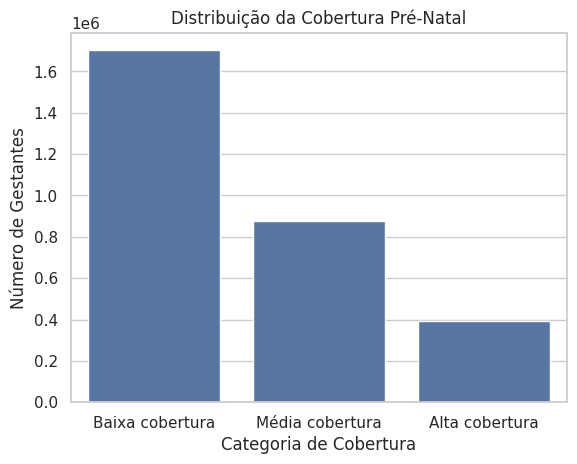

In [93]:
# Apresenta gráfico da distribuição geral
plt.figure()
sns.countplot(x='COBERTURA', data=df_com_prenatal)
plt.title('Distribuição da Cobertura Pré-Natal')
plt.xlabel('Categoria de Cobertura')
plt.ylabel('Número de Gestantes')
plt.show()

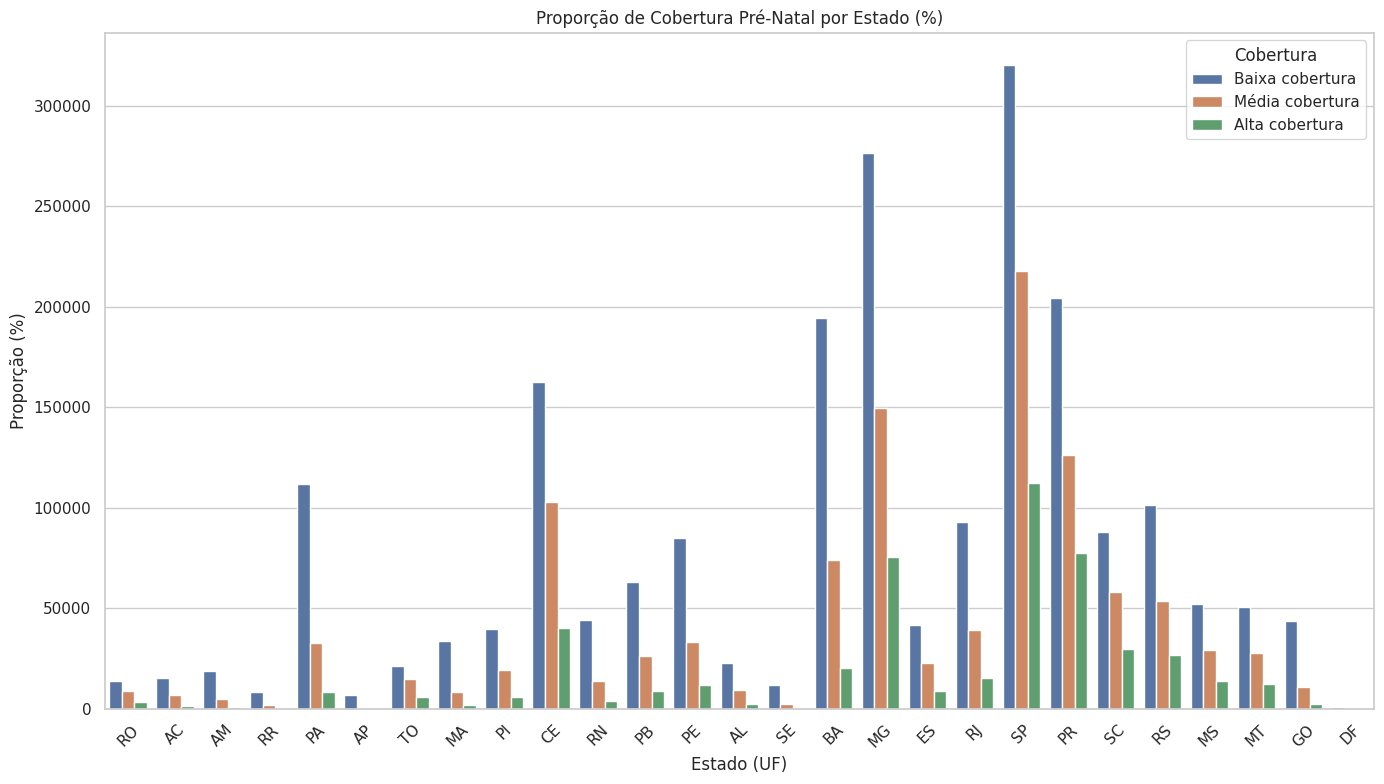

In [94]:
# Análise por estado
cobertura_uf = df_com_prenatal.groupby(['CO_UF_IBGE', 'COBERTURA'], observed=True).size().reset_index(name='qtd')
cobertura_uf['UF'] = cobertura_uf['CO_UF_IBGE'].map(uf_map)  # Garante que a coluna UF existe

# Apresenta o gráfico de proporção por Estado
plt.figure(figsize=(14, 8))
sns.barplot(
    x='UF',
    y='qtd',
    hue='COBERTURA',
    data=cobertura_uf,
    estimator=lambda x: sum(x)/len(cobertura_uf)*100
)
plt.title('Proporção de Cobertura Pré-Natal por Estado (%)')
plt.xlabel('Estado (UF)')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45)
plt.legend(title='Cobertura')
plt.tight_layout()
plt.show()

In [95]:
# Cálculo de taxas por 100 mil gestantes
total_gestantes_uf = df.groupby('CO_UF_IBGE', observed=True).size().reset_index(name='total_gestantes')
total_gestantes_uf['UF'] = total_gestantes_uf['CO_UF_IBGE'].map(uf_map)

# Juntando os dados e garantindo que todas as colunas necessárias existem
cobertura_com_taxas = pd.merge(
    cobertura_uf,
    total_gestantes_uf,
    on='CO_UF_IBGE'
)
cobertura_com_taxas['taxa_por_100mil'] = round((cobertura_com_taxas['qtd'] / cobertura_com_taxas['total_gestantes']) * 100000, 1)

# Garantir que a coluna UF existe antes de pivotar
# Correção do nosso erro anterior:
if 'UF' not in cobertura_com_taxas.columns:
    cobertura_com_taxas['UF'] = cobertura_com_taxas['CO_UF_IBGE'].map(uf_map)

# Tabela de taxas usando pivot_table com observed=True
tabela_taxas = cobertura_com_taxas.pivot_table(
    index='UF',
    columns='COBERTURA',
    values='taxa_por_100mil',
    aggfunc='first',
    observed=True
).fillna(0).sort_values('Alta cobertura', ascending=False)

print("\nTaxa de cobertura pré-natal por 100 mil gestantes em cada estado:")
print(tabela_taxas.reset_index().to_string(index=False))


Taxa de cobertura pré-natal por 100 mil gestantes em cada estado:
UF  Baixa cobertura  Média cobertura  Alta cobertura
PR          50106.4          30935.0         18958.7
SP          49226.3          33462.0         17311.7
SC          50074.2          33096.2         16829.6
MG          55109.3          29822.3         15068.4
RS          55635.3          29574.2         14790.5
MS          54686.4          30900.2         14413.4
TO          50636.7          35200.3         14163.0
RO          52163.9          34136.3         13699.8
MT          55499.2          30841.9         13658.9
CE          53215.9          33644.3         13139.8
ES          57094.2          30842.1         12063.6
RJ          63139.1          26499.4         10361.5
PI          60951.5          29795.4          9253.1
PE          65251.7          25580.9          9167.4
PB          64113.0          27012.6          8874.3
AL          65672.2          26679.2          7648.5
BA          67275.6          256

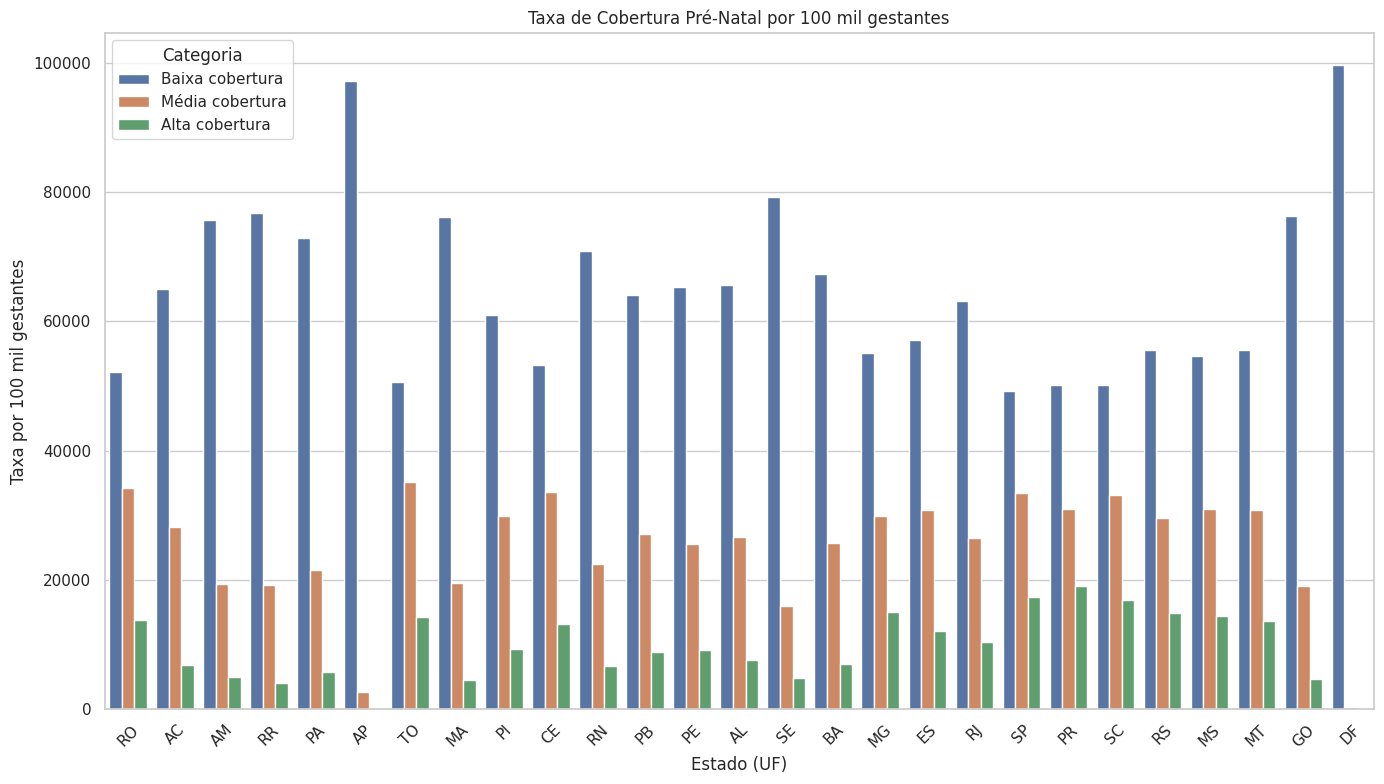


Tabela comparativa com ranking de segurança:
UF  Taxa_Baixa  Taxa_Média  Taxa_Alta  Ranking Segurança
PR     50106.4     30935.0    18958.7                1.0
SP     49226.3     33462.0    17311.7                2.0
SC     50074.2     33096.2    16829.6                3.0
MG     55109.3     29822.3    15068.4                4.0
RS     55635.3     29574.2    14790.5                5.0
MS     54686.4     30900.2    14413.4                6.0
TO     50636.7     35200.3    14163.0                7.0
RO     52163.9     34136.3    13699.8                8.0
MT     55499.2     30841.9    13658.9                9.0
CE     53215.9     33644.3    13139.8               10.0
ES     57094.2     30842.1    12063.6               11.0
RJ     63139.1     26499.4    10361.5               12.0
PI     60951.5     29795.4     9253.1               13.0
PE     65251.7     25580.9     9167.4               14.0
PB     64113.0     27012.6     8874.3               15.0
AL     65672.2     26679.2     7648.5     

In [98]:
# Gráfico comparativo de taxas com Ranking ranking de acuracidade de 2014
plt.figure(figsize=(14, 8))
sns.barplot(
    x='UF',
    y='taxa_por_100mil',
    hue='COBERTURA',
    data=cobertura_com_taxas
)
plt.title('Taxa de Cobertura Pré-Natal por 100 mil gestantes')
plt.xlabel('Estado (UF)')
plt.ylabel('Taxa por 100 mil gestantes')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

# Tabela resumo com um ranking
tabela_resumo = cobertura_com_taxas.groupby('UF').agg(
    Taxa_Baixa=('taxa_por_100mil', lambda x: x[cobertura_com_taxas['COBERTURA'] == 'Baixa cobertura'].sum()),
    Taxa_Média=('taxa_por_100mil', lambda x: x[cobertura_com_taxas['COBERTURA'] == 'Média cobertura'].sum()),
    Taxa_Alta=('taxa_por_100mil', lambda x: x[cobertura_com_taxas['COBERTURA'] == 'Alta cobertura'].sum())
).reset_index()

tabela_resumo['Ranking Segurança'] = tabela_resumo['Taxa_Alta'].rank(ascending=False, method='min')
tabela_resumo = tabela_resumo.sort_values('Taxa_Alta', ascending=False)

print("\nTabela comparativa com ranking de segurança:")
print(tabela_resumo.to_string(index=False))

## ✅ Conclusão
Este notebook consolidou a análise dos dados do SISPRENATAL com base em três scripts:
- Avaliação geral das colunas e estrutura
- Estatísticas descritivas iniciais
- Tratamentos finais para extração de insights

📌 **Próximos Objetivos:**
- Aplicar modelos preditivos
- Gerar dashboards interativos
- Apresentar visualizações segmentadas por região, idade ou escolaridade